In [238]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [251]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import glob
import os
from collections import OrderedDict
import folder_handling as fh
reload(fh)
plt.style.use('seaborn-pastel')

In [252]:
path_to_raw_images = "../../images/color_experiments/experiment_1/raw_photo"
path_compressed = fh.compress_photos(path_to_raw_images=path_to_raw_images)

Directory already exists
Directory already exists
Directory already exists
Directory already exists
Directory already exists


In [253]:
path_illums = fh.get_path_contents(path=path_to_raw_images)

In [255]:
path_images = fh.get_path_contents(path_illums[0])

In [256]:
color_paths = fh.group_by_colors(path_images)

In [257]:
color_paths

OrderedDict([('red',
              ['../../images/color_experiments/experiment_1/raw_photo/illumination_1/red_1.jpg',
               '../../images/color_experiments/experiment_1/raw_photo/illumination_1/red_2.jpg']),
             ('white',
              ['../../images/color_experiments/experiment_1/raw_photo/illumination_1/white_1.jpg',
               '../../images/color_experiments/experiment_1/raw_photo/illumination_1/white_2.jpg'])])

In [258]:
for color in color_paths:
    for img_path in color_paths[color]:
        img_bgr = cv2.imread(img_path,cv2.IMREAD_COLOR)
        img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)

Идея: 
* подгрузить сырые изображения
* сжать их, используя пирамидальное понижение качества
* работать со сжатыми изображениями

Вопрос 0.
-------


Как пирамидальное уменьшение изменяет статистики цветовых каналов? 

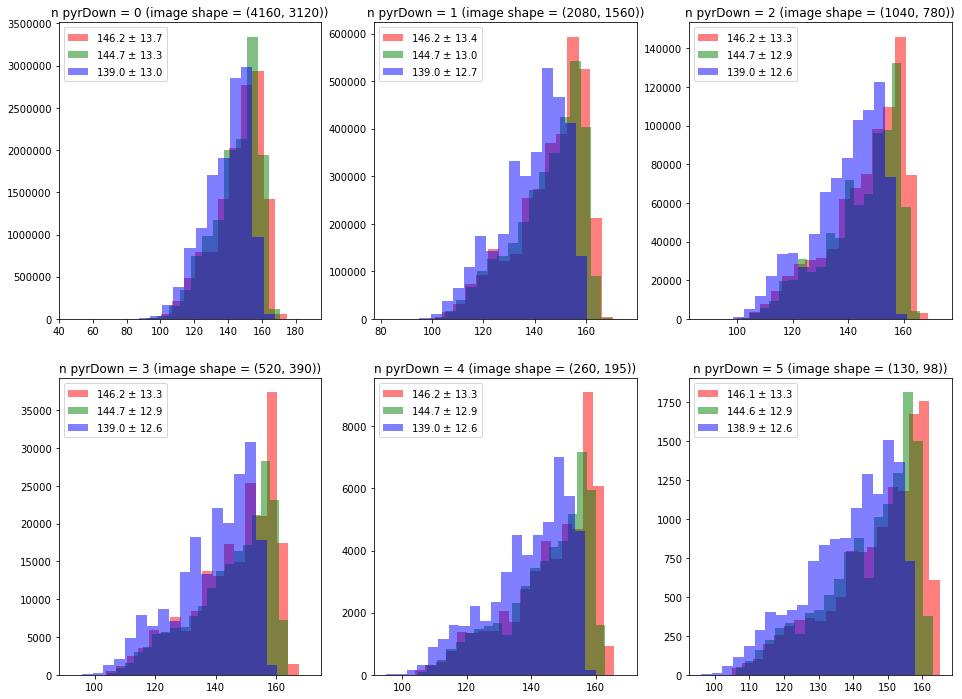

In [259]:
colors = ['r','g','b']

plt.figure(figsize=(16,12))
for n in xrange(6):
    plt.subplot(2,3,n+1)
    img = pyrDowning(img_rgb,n_downs=n)
    for i in xrange(3):
        color_values = np.ravel(img[:,:,i])

        mean = np.mean(color_values)
        std = np.std(color_values)

        plt.hist(color_values,color=colors[i],label = "%.1f $ \pm $ %.1f"%(mean,std),bins=20,alpha=0.5)
        plt.title('n pyrDown = {} (image shape = {})'.format(n,img.shape[:2]))
    plt.legend()

Ответ:

никак, чего и следовало ожидать. Поэтому, будем использовать сжатые в 8 раз (3 раза использованный pyrDown) изображения. 